In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
amazon_ratings=pd.read_csv("E:\Python\ML_PROJECTS\Product_recommendation_system_ecommerce\\ratings_Beauty.csv")

In [5]:
amazon_ratings

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [6]:
amazon_ratings.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [7]:
amazon_ratings.shape

(2023070, 4)

# EDA

In [8]:
popular_products=amazon_ratings.groupby('ProductId')['Rating'].count().reset_index()
most_popular=popular_products.sort_values(by='Rating',ascending=False)
most_popular

,ProductId,Rating
65766,B001MA0QY2,7533
10516,B0009V1YR8,2869
110873,B0043OYFKU,2477
2365,B0000YUXI0,2143
105018,B003V265QW,2088
...,...,...
128402,B004U81OBC,1
128397,B004U7R0EI,1
128393,B004U7Q2O2,1
128390,B004U7NKRE,1


<AxesSubplot:xlabel='ProductId'>

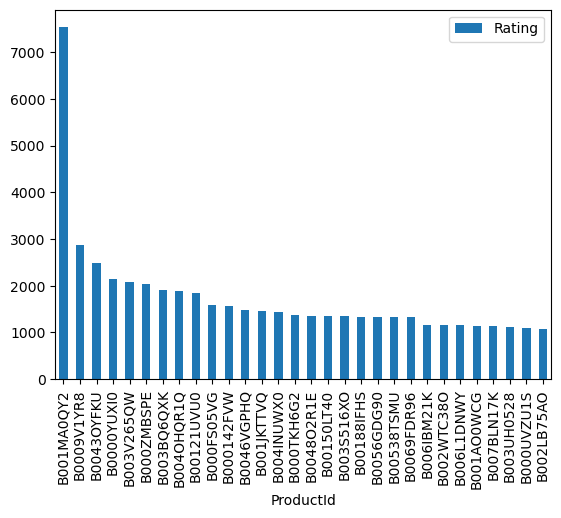

In [9]:
most_popular.head(30).plot(x='ProductId',kind='bar')

In [10]:
amazon_ratings1 = amazon_ratings.head(10000)

In [11]:
ratings_utility_matrix=amazon_ratings1.pivot_table(index='UserId',values='Rating',columns='ProductId',fill_value=0)
ratings_utility_matrix

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x=ratings_utility_matrix.T
x

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000052YPU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Truncated Singular Value Decomposition (SVD) is a dimensionality reduction technique often used in the context of linear algebra, statistics, and machine learning. It is particularly useful for reducing the dimensionality of large datasets, which can help with both computational efficiency and noise reduction.

Singular Value Decomposition (SVD)  

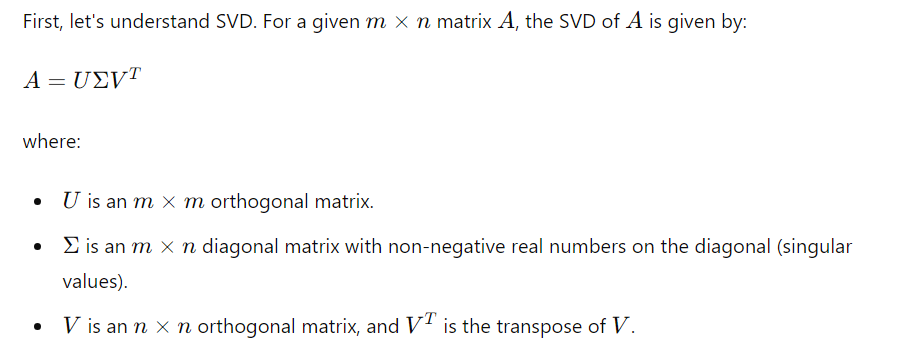

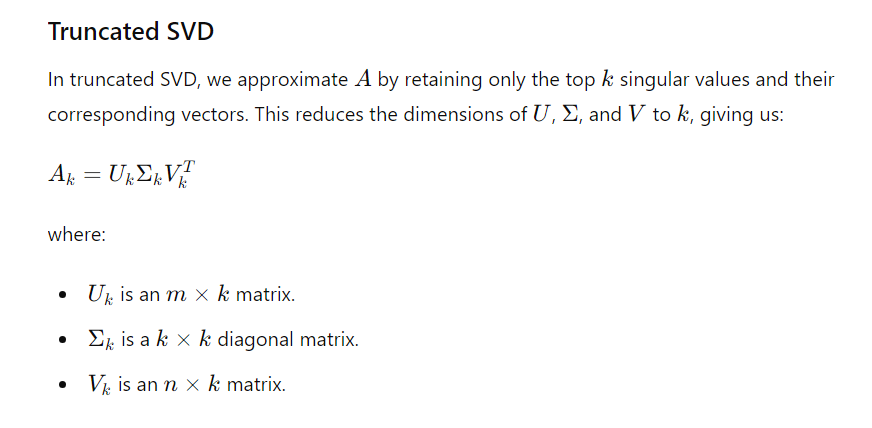

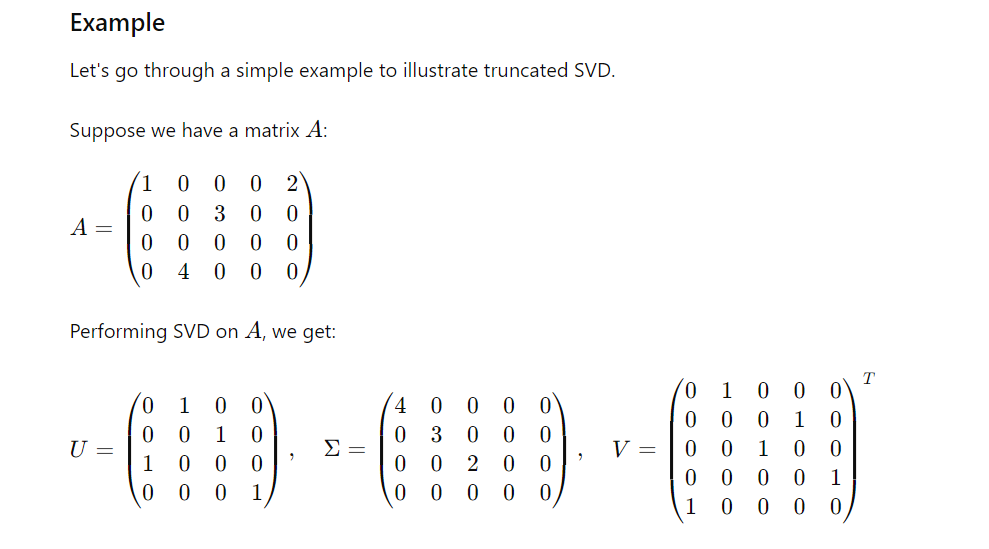

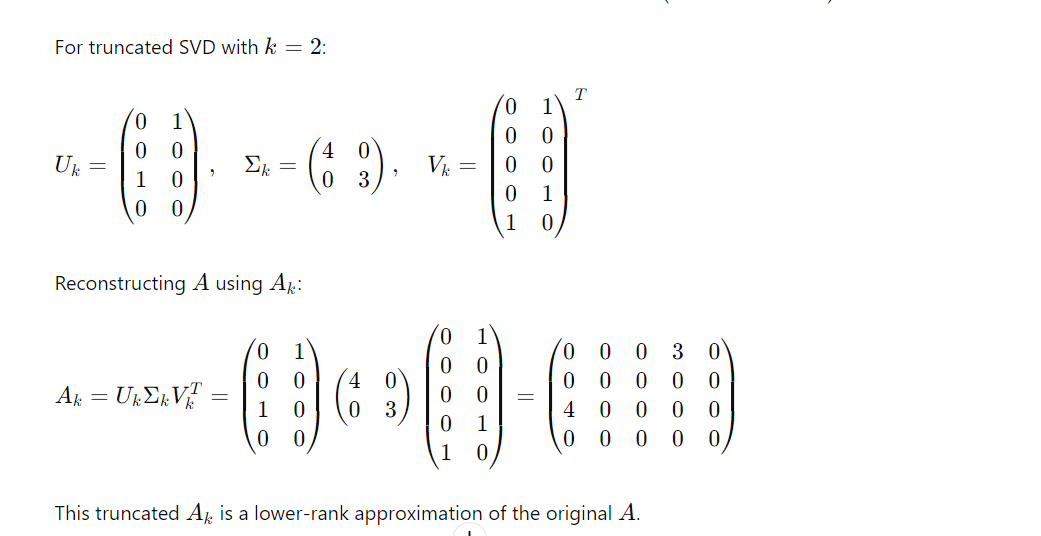

In [13]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=10)
decomposed_matrix=svd.fit_transform(x)

In [14]:
decomposed_matrix.shape

(886, 10)

In [17]:
corr_matrix=np.corrcoef(decomposed_matrix)
corr_matrix

array([[ 1.        ,  0.91176315, -0.88135041, ..., -0.18684843,
        -0.93540071,  0.04085417],
       [ 0.91176315,  1.        , -0.66018266, ..., -0.24851177,
        -0.83952429,  0.38468016],
       [-0.88135041, -0.66018266,  1.        , ...,  0.08799252,
         0.8838836 ,  0.14947494],
       ...,
       [-0.18684843, -0.24851177,  0.08799252, ...,  1.        ,
         0.30832003, -0.10074907],
       [-0.93540071, -0.83952429,  0.8838836 , ...,  0.30832003,
         1.        , -0.0243967 ],
       [ 0.04085417,  0.38468016,  0.14947494, ..., -0.10074907,
        -0.0243967 ,  1.        ]])

<AxesSubplot:>

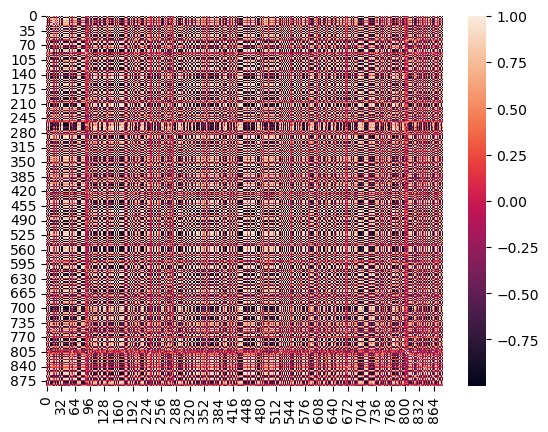

In [19]:
import seaborn as sns
sns.heatmap(corr_matrix)

In [20]:
x.index[99]

'6117036094'

In [23]:
i="6117036094"
product_names=list(x.index)
product_ID = product_names.index(i)
product_ID

99

In [24]:
corr_productid=corr_matrix[product_ID]
corr_productid

array([-0.85474499, -0.96292633,  0.66228113,  0.98230973, -0.70195129,
       -0.86574144, -0.10137573,  0.99493875, -0.86602394, -0.946069  ,
       -0.10137573, -0.94857785, -0.02831503, -0.83717721, -0.86574144,
       -0.10137573, -0.10137573, -0.9762263 , -0.02830742, -0.99717104,
       -0.96935355, -0.99046365,  0.16160112, -0.94902346, -0.96784659,
        0.98347652,  0.98406343, -0.79192205, -0.94902346,  0.98205204,
        0.9809303 , -0.86553134,  0.72784927,  0.98344121, -0.94855506,
       -0.86574144,  0.98344121,  0.91805326, -0.86626546, -0.79367916,
       -0.79361952,  0.98347652, -0.86557738, -0.86574144, -0.86574144,
       -0.86574144, -0.94902346, -0.86574144, -0.86596457, -0.79367916,
       -0.83253772,  0.85295953,  0.96338392, -0.9408398 ,  0.25617368,
        0.95835706, -0.50757894, -0.54813413,  0.07520002, -0.8146438 ,
       -0.98830075,  0.9862082 , -0.50098891,  0.98844326,  0.95831259,
       -0.98178481, -0.8804538 , -0.93339071, -0.99731593,  0.90

In [26]:
Recommend = list(x.index[corr_productid > 0.90])
Recommend.remove(i) 

Recommend[0:9]

['0737104473',
 '130414089X',
 '1304511073',
 '1304511081',
 '1304511138',
 '1304511146',
 '1304622223',
 '1304622460',
 '1304622622']